In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import geopandas


import numpy as np

import shapely.wkt

import osmnx as ox

ox.settings.log_console=True

In [2]:
# TZ convex hull
tza = shapely.wkt.loads('POLYGON((36.51663051180202 -11.76400833641038,34.96148292189685 -11.57459896625327,34.96058197176314 -11.57433910112481,31.17774355463043 -8.599754824872136,29.72620481349243 -6.245866261163819,29.72511552786495 -6.24409782337949,29.72380939573032 -6.241814222429691,29.7230927952378 -6.239093880200518,29.72281445693241 -6.236669876630748,29.59019453157737 -4.9111553760294,29.60174686518157 -4.748289022027135,29.65513992021926 -4.475508561052573,29.655536158368 -4.473626633198812,29.65999383707959 -4.45272733051314,30.5010559612266 -1.069557216108248,30.50168993671256 -1.067188584728907,30.76681900204326 -0.985787540066914,34.09345663886533 -1.028860821851255,37.47673403145131 -2.934585354550944,37.50147252618095 -2.948744403373551,37.5079277503655 -2.952578919419102,37.52476915414628 -2.962740677865566,37.54887874123757 -2.97746242521771,37.54953281796728 -2.977899185833122,37.55215701305151 -2.979651507804265,37.56101067189169 -2.985563594112739,37.60151493196877 -3.01261057250798,37.62360183359599 -3.027570966651026,37.62433622001061 -3.028068400632912,37.67145113561096 -3.06100829882439,39.86714817135311 -4.889450609313316,39.86998985049286 -4.892130746409637,39.87181271402675 -4.896867504414818,39.87462105754846 -4.90491261676847,39.87481540740413 -4.905660773235087,39.87498060504927 -4.906690703648619,40.44564084072362 -10.34828319153082,40.44557937828669 -10.35134869946121,40.41444609996741 -10.4985572059218,40.41376857934758 -10.50129182229417,40.41217316466955 -10.50448579103445,40.36164348871228 -10.56282399929405,39.99720481916869 -10.81590079143496,39.24962416337877 -11.17425332941982,39.24574931945642 -11.17595282265233,38.48849455259909 -11.4184123077983,38.48539226155694 -11.41938025691861,37.41436061608537 -11.68247473285284,37.39913517267601 -11.68551296968752,37.38961960603095 -11.68733336894736,37.38422813792191 -11.68823987578439,36.51663051180202 -11.76400833641038))')

In [19]:
G = ox.graph_from_polygon(
    tza,
    simplify=True,
    retain_all=True,
    custom_filter='["highway"~"trunk|primary|secondary"]'
)

In [20]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)

<AxesSubplot: >

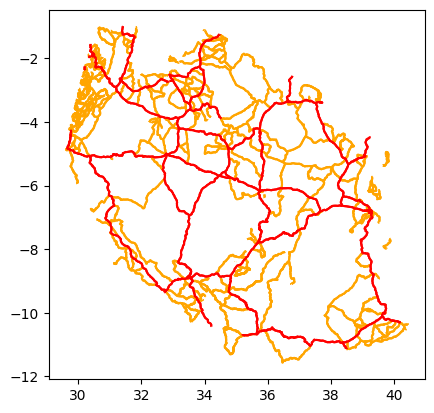

In [25]:
ax = gdf_edges[gdf_edges['highway'].str.contains('secondary')].plot(color="orange")
gdf_edges[gdf_edges['highway'].str.contains('primary')].plot(ax=ax, color="orange")
gdf_edges[gdf_edges['highway'].str.contains('trunk')].plot(ax=ax, color="red")

<AxesSubplot: >

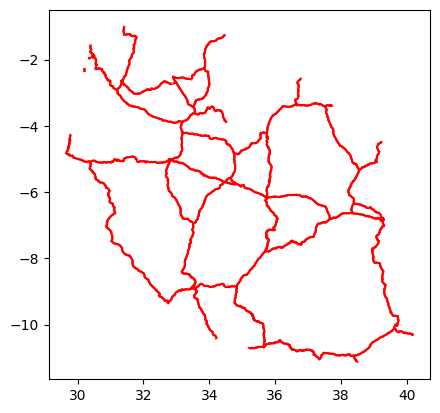

In [27]:
gdf_edges[gdf_edges['highway'].str.contains('trunk')].plot(color="red")

<AxesSubplot: >

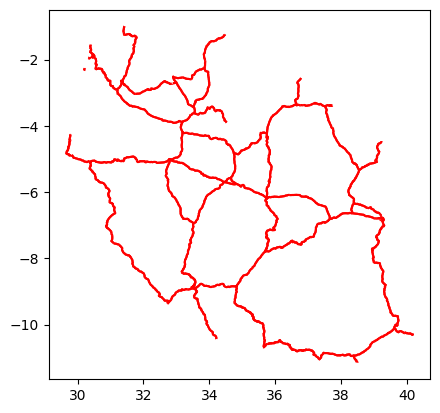

In [28]:
gdf_edges[gdf_edges['highway'] == 'trunk'].plot(color="red")

In [29]:
gdf_edges

osmid   
u          v          key                                                      
4342252715 6117309614 0    [651241699, 652541656, 652541657, 436353787, 6...  \
6117309614 6117309626 0                                            652539356   
           4342252715 0    [651241699, 652541656, 652541657, 436353787, 6...   
6117309626 437413061  0                     [652179313, 37424421, 652179310]   
           6117309614 0                                            652539356   
...                                                                      ...   
5259771042 1640798956 0                                            312877727   
           1640798932 0                                            544118601   
6490842143 5048551322 0         [517596928, 517596930, 517596923, 517596931]   
           1640798956 0                    [691659488, 691659491, 151262157]   
           5048551771 0                               [691659490, 517336589]   

                           ref    highway  oneway       reversed     length   
u          v          key                                                     
4342252715 6117309614 0    T16  secondary   False           True  69078.203  \
6117309614 6117309626 0         secondary    True          False     37.303   
           4342252715 0    T16  secondary   False          False  69078.203   
6117309626 437413061  0    T16  secondary   False           True  41094.890   
           6117309614 0         secondary    True          False     14.334   
...                        ...        ...     ...            ...        ...   
5259771042 1640798956 0         secondary   False           True     43.818   
           1640798932 0         secondary    True          False     28.240   
6490842143 5048551322 0         secondary   False           True   7561.719   
           1640798956 0         secondary   False  [False, True]   2920.659   
           5048551771 0         secondary   False          False   7562.798   

                          bridge   
u          v          key          
4342252715 6117309614 0      yes  \
6117309614 6117309626 0            
           4342252715 0      yes   
6117309626 437413061  0      yes   
           6117309614 0            
...                          ...   
5259771042 1640798956 0            
           1640798932 0            
6490842143 5048551322 0      yes   
           1640798956 0            
           5048551771 0            

                                                                    geometry   
u          v          key                                                      
4342252715 6117309614 0    LINESTRING (36.73714 -9.10524, 36.73667 -9.104...  \
6117309614 6117309626 0    LINESTRING (36.71712 -8.68305, 36.71710 -8.683...   
           4342252715 0    LINESTRING (36.71712 -8.68305, 36.71716 -8.683...   
6117309626 437413061  0    LINESTRING (36.71711 -8.68294, 36.71717 -8.682...   
           6117309614 0    LINESTRING (36.71711 -8.68294, 36.71713 -8.682...   
...                                                                      ...   
5259771042 1640798956 0    LINESTRING (30.00334 -3.12254, 30.00334 -3.122...   
           1640798932 0    LINESTRING (30.00334 -3.12254, 30.00322 -3.122...   
6490842143 5048551322 0    LINESTRING (30.01761 -3.12293, 30.01762 -3.123...   
           1640798956 0    LINESTRING (30.01761 -3.12293, 30.01755 -3.122...   
           5048551771 0    LINESTRING (30.01761 -3.12293, 30.01761 -3.122...   

                             junction name maxspeed tunnel lanes access width  
u          v          key                                                      
4342252715 6117309614 0                                                        
6117309614 6117309626 0    roundabout                                          
           4342252715 0                                                        
6117309626 437413061  0                                                        
           6

In [30]:
gdf = gdf_edges.reset_index(drop=True)

In [31]:
gdf

,osmid,ref,highway,oneway,reversed,length,bridge,geometry,junction,name,maxspeed,tunnel,lanes,access,width
0,"[651241699, 652541656, 652541657, 436353787, 6...",T16,secondary,False,True,69078.203,yes,"LINESTRING (36.73714 -9.10524, 36.73667 -9.104...",,,,,,,
1,652539356,,secondary,True,False,37.303,,"LINESTRING (36.71712 -8.68305, 36.71710 -8.683...",roundabout,,,,,,
2,"[651241699, 652541656, 652541657, 436353787, 6...",T16,secondary,False,False,69078.203,yes,"LINESTRING (36.71712 -8.68305, 36.71716 -8.683...",,,,,,,
3,"[652179313, 37424421, 652179310]",T16,secondary,False,True,41094.890,yes,"LINESTRING (36.71711 -8.68294, 36.71717 -8.682...",,,,,,,
4,652539356,,secondary,True,False,14.334,,"LINESTRING (36.71711 -8.68294, 36.71713 -8.682...",roundabout,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5966,312877727,,secondary,False,True,43.818,,"LINESTRING (30.00334 -3.12254, 30.00334 -3.122...",,,,,,,
5967,544118601,,secondary,True,False,28.240,,"LINESTRING (30.00334 -3.12254, 30.00322 -3.122...",,,,,,,
5968,"[517596928, 517596930, 517596923, 517596931]",,secondary,False,True,7561.719,yes,"LINESTRING (30.01761 -3.12293, 30.01762 -3.123...",,,,,,,
5969,"[691659488, 691659491, 151262157]",,secondary,False,"[False, True]",2920.659,,"LINESTRING (30.01761 -3.12293, 30.01755 -3.122...",,,,,,,
